<Figure size 3000x1800 with 0 Axes>

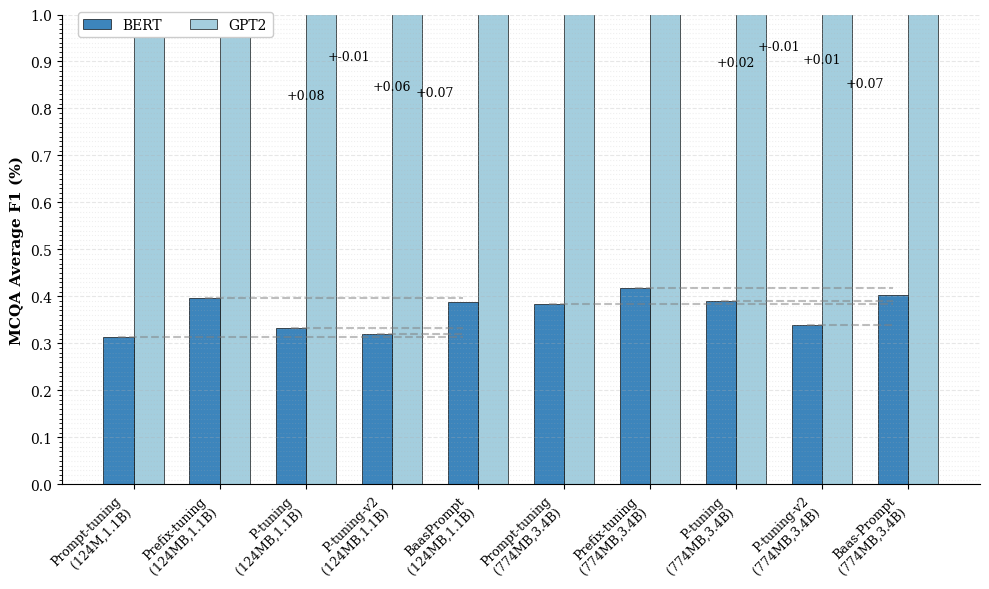

In [2]:
import matplotlib.pyplot as plt  
import numpy as np  
from matplotlib.ticker import MultipleLocator  

# 设置字体为 Times New Roman  
# plt.rcParams['font.family'] = 'Times New Roman'  
# plt.rcParams['mathtext.fontset'] = 'stix'  
plt.rcParams['font.family'] = 'serif'  # 使用 serif 字体族  
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman']  
plt.rcParams['mathtext.fontset'] = 'dejavuserif'  


# 仅使用 GPT2-large 和 GPT2-xl
# 数据准备  
labels = [  
  
    'Prompt-tuning\n(124M,1.1B)',   
    'Prefix-tuning\n(124MB,1.1B)',   
    'P-tuning\n(124MB,1.1B)',  
    'P-tuning-v2\n(124MB,1.1B)',   
    'BaasPrompt\n(124MB,1.1B)', 
    
       
    'Prompt-tuning\n(774MB,3.4B)',  
    'Prefix-tuning\n(774MB,3.4B)',  
    'P-tuning\n(774MB,3.4B)',  
    'P-tuning-v2\n(774MB,3.4B)',
    'Baas-Prompt\n(774MB,3.4B)',
]  

# 补充完整的数据  
# 前5个是1B， 后5个是3B
bert_scores = [0.313,0.397,0.332,0.320,0.388, 0.384, 0.418,0.390,0.339,0.404]  
gpt2_scores = [63, 70, 63, 77.6, 78.2, 65.5, 72.3, 65.8, 79.1, 80.5]  

# 设置图形大小和DPI  
plt.figure(figsize=(10, 6), dpi=300)  

# 创建图形和轴对象  
fig, ax = plt.subplots(figsize=(10, 6))  

# 设置柱状图的位置  
x = np.arange(len(labels))  
width = 0.35  

# 创建柱状图，使用更专业的配色方案  
rects1 = ax.bar(x - width/2, bert_scores, width, label='BERT',   
                color='#2878B5', alpha=0.9, edgecolor='black', linewidth=0.5)  
rects2 = ax.bar(x + width/2, gpt2_scores, width, label='GPT2',  
                color='#9AC9DB', alpha=0.9, edgecolor='black', linewidth=0.5)  

# 设置标签和标题  
ax.set_ylabel('MCQA Average F1 (%)', fontsize=11, fontweight='bold')  
ax.set_xticks(x)  
ax.set_xticklabels(labels, fontsize=9, rotation=45, ha='right')  

# 设置图例  
ax.legend(frameon=True, loc='upper left', bbox_to_anchor=(0.01, 1.02),  
         ncol=2, fontsize=10, framealpha=1)  

# 设置y轴范围和刻度  
ax.set_ylim(0, 1)  
ax.yaxis.set_major_locator(MultipleLocator(0.1))  
ax.yaxis.set_minor_locator(MultipleLocator(0.01))  

# 设置网格  
ax.grid(axis='y', linestyle='--', alpha=0.3, which='major', zorder=0)  
ax.grid(axis='y', linestyle=':', alpha=0.2, which='minor', zorder=0)  

# 移除顶部和右侧边框  
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)  

# ------------------------------------------
# 添加性能提升标注  
# improvements = [  
#     (0, 1, 66, '+2.0'),  
#     (2, 3, 72.5, '+2.0'),  
#     (7, 8, 74.3, '+1.9'),  
# ]  

# for start, end, y_pos, text in improvements:  
#     ax.hlines(y=y_pos, xmin=start-width/2, xmax=end-width/2,  
#               colors='gray', linestyles='--', alpha=0.5)  
#     ax.annotate(text, xy=((start+end)/2, y_pos+0.5),  
#                 xytext=((start+end)/2, y_pos+0.5),  
#                 ha='center', va='bottom', fontsize=9)  

# BERT模型的性能提升比较  
# 第一组（1.1B~1.5B）的比较，从其他方法到BaasPrompt(索引4)  
improvements_small_bert = [  
    (0, 4, bert_scores[0], f'+{(bert_scores[4]-bert_scores[0]):.2f}'),  # Prompt-tuning到BaasPrompt  
    (1, 4, bert_scores[1], f'+{(bert_scores[4]-bert_scores[1]):.2f}'),  # Prefix-tuning到BaasPrompt  
    (2, 4, bert_scores[2], f'+{(bert_scores[4]-bert_scores[2]):.2f}'),  # P-tuning到BaasPrompt  
    (3, 4, bert_scores[3], f'+{(bert_scores[4]-bert_scores[3]):.2f}'),  # P-tuning-v2到BaasPrompt  
]  

# 第二组（3B~3.3B）的比较，从其他方法到BaasPrompt(索引9)  
improvements_large_bert = [  
    (5, 9, bert_scores[5], f'+{(bert_scores[9]-bert_scores[5]):.2f}'),  # Prompt-tuning到BaasPrompt  
    (6, 9, bert_scores[6], f'+{(bert_scores[9]-bert_scores[6]):.2f}'),  # Prefix-tuning到BaasPrompt  
    (7, 9, bert_scores[7], f'+{(bert_scores[9]-bert_scores[7]):.2f}'),  # P-tuning到BaasPrompt  
    (8, 9, bert_scores[8], f'+{(bert_scores[9]-bert_scores[8]):.2f}'),  # P-tuning-v2到BaasPrompt  
]  

# Qwen2模型的性能提升比较  
# 第一组（1.1B~1.5B）的比较  
improvements_small_gpt2 = [  
    (0, 4, gpt2_scores[0], f'+{(gpt2_scores[4]-gpt2_scores[0]):.2f}'),  # Prompt-tuning到BaasPrompt  
    (1, 4, gpt2_scores[1], f'+{(gpt2_scores[4]-gpt2_scores[1]):.2f}'),  # Prefix-tuning到BaasPrompt  
    (2, 4, gpt2_scores[2], f'+{(gpt2_scores[4]-gpt2_scores[2]):.2f}'),  # P-tuning到BaasPrompt  
    (3, 4, gpt2_scores[3], f'+{(gpt2_scores[4]-gpt2_scores[3]):.2f}'),  # P-tuning-v2到BaasPrompt  
]  

# 第二组（3B~3.3B）的比较  
improvements_large_gpt2 = [  
    (5, 9, gpt2_scores[5], f'+{(gpt2_scores[9]-gpt2_scores[5]):.2f}'),  # Prompt-tuning到BaasPrompt  
    (6, 9, gpt2_scores[6], f'+{(gpt2_scores[9]-gpt2_scores[6]):.2f}'),  # Prefix-tuning到BaasPrompt  
    (7, 9, gpt2_scores[7], f'+{(gpt2_scores[9]-gpt2_scores[7]):.2f}'),  # P-tuning到BaasPrompt  
    (8, 9, gpt2_scores[8], f'+{(gpt2_scores[9]-gpt2_scores[8]):.2f}'),  # P-tuning-v2到BaasPrompt  
]  

def add_improvement_annotations(improvements, scores, width_offset, y_offset=0.5):  
    for start, end, y_pos, text in improvements:  
        # 绘制水平虚线，从其他方法连接到BaasPrompt  
        ax.hlines(y=scores[start],   
                 xmin=start+width_offset,   
                 xmax=end+width_offset,  
                 colors='gray', linestyles='--', alpha=0.5)  
        
        # 添加文本标注  
        ax.annotate(text,  
                   xy=((start+end)/2, scores[start]+y_offset),  
                   xytext=((start+end)/2, scores[start]+y_offset),  
                   ha='center', va='bottom', fontsize=9)  

# 为BERT和Qwen2分别添加标注，使用不同的width_offset和y_offset避免重叠  
add_improvement_annotations(improvements_small_bert, bert_scores, -width/2, y_offset=0.5)  
add_improvement_annotations(improvements_large_bert, bert_scores, -width/2, y_offset=0.5)  
add_improvement_annotations(improvements_small_gpt2, gpt2_scores, width/2, y_offset=0.8)  
add_improvement_annotations(improvements_large_gpt2, gpt2_scores, width/2, y_offset=0.8) 
# -----------------------------------------------------------

# 调整布局  
plt.tight_layout()  

# 保存图片（建议同时保存PDF格式用于论文提交）  
plt.savefig('comparison_plot.png', dpi=300, bbox_inches='tight')  
plt.savefig('comparison_plot.pdf', bbox_inches='tight')  

# 显示图形  
plt.show()